In [1]:
#Clustering for uber data. EPDS Project Batch 8
#Author - Umesh Babu

import pandas as pd
import numpy as np 

import folium
import seaborn as sb



#import needed for K means
from sklearn.preprocessing import StandardScaler
# read the csv file
df = pd.read_csv("//Users//umeshbabu//EPDS//Project//originalDataSet//Uber-dataset//uber-raw-data-apr14.csv")

#checking size of dataset
df.shape

df.count
#display first four rows to check data load
df.head()

#select the data required for clustering into a seperate data frame
clusterDF = df[['Lat','Lon']]
clusterDF.dtypes

#We are applying a K-Means clustering. The first step is to find the optimal value for K. This can be found out through Elbow plot

#KMeans(algorithm ='auto',copy_x=True,inti='k-means++',max_iter=300,n_clusters=14, n_init=10, n_jobs=None,
 #     precompute_distances='auto',random_state=None, tol=0.0001,verbose=0)
    
#creating Elbow graph for finding optimal K






Lat    float64
Lon    float64
dtype: object

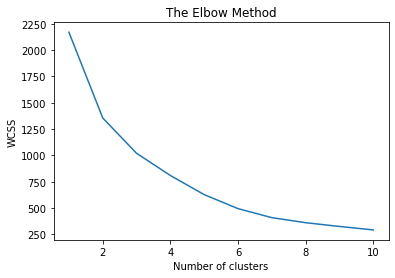

(564516, 5)

In [2]:
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
wcss =[]
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(clusterDF)
    wcss.append(kmeans.inertia_)

    
# Plot the graph to visualize the Elbow Method to find the optimal number of cluster  
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Applying KMeans to the dataset with the optimal number of cluster

kmeans=KMeans(n_clusters= 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 12345)
kmeans.fit(clusterDF)

#Identity cluster and add appropriate cluster values in new column
y_predicted = kmeans.fit_predict(df[['Lat', 'Lon']])
y_predicted
df['cluster'] = y_predicted
#df.head()
#storing cluster centriods

centroids = kmeans.cluster_centers_

#a new data frame from cluster centres
clocation = pd.DataFrame(centroids, columns = ['Latitude','Longitude'])

#checking size of dataset
df.shape


In [14]:
df1 = df[df.cluster ==0]
df1.shape

(249343, 5)

In [15]:
df2 = df[df.cluster == 1]
df2.shape


(14413, 5)

In [16]:
df3 = df[df.cluster == 2]
df3.shape


(19147, 5)

In [17]:
df4 = df[df.cluster == 3]
df4.shape

(216862, 5)

In [18]:
df5 = df[df.cluster == 4]
df5.shape

(59894, 5)

In [19]:
df6 = df[df.cluster == 5]
df6.shape

(4857, 5)

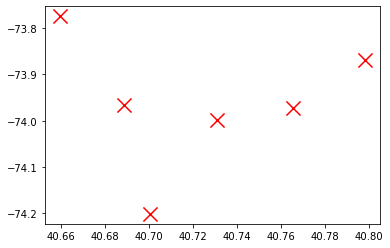

In [14]:
#plotting all centriods in a scatter plot

plt.scatter(clocation['Latitude'], clocation['Longitude'], marker = 'x', c = 'red', s =200)
plt.show()



In [3]:
#Converting centroid into lists

centroid = clocation.values.tolist()

clocation
#plotting the centroids on the map using the folium library.

map = folium.Map(location=[40.700541 , -74.201673], zoom_start = 25)
for point in range (0, len(centroid)):
    folium.Marker(centroid[point], popup = centroid[point]).add_to(map)
    
map


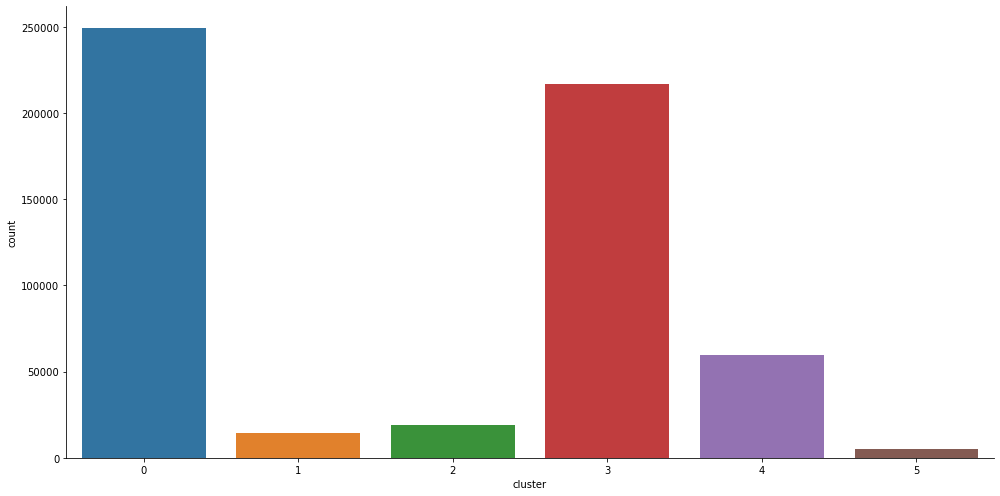

In [16]:
sb.catplot(data = df, x = 'cluster', kind = 'count', height = 7, aspect = 2)

In [4]:
new_location = [(40.6556, -73.5631)]
kmeans.predict(new_location)

array([2], dtype=int32)